In [22]:
import numpy as np 
import matplotlib.pyplot as plt 
import joblib

import plotly.graph_objects as go

from cfl.cluster_methods.kmeans import KMeans
from cfl.experiment import Experiment
from visual_bars import generate_visual_bars_data as vbd
from cfl.util.data_processing import one_hot_encode
from cfl.dataset import Dataset
from cfl.visualization_methods import clustering_to_sankey as sk


In [23]:
# create a visual bars data set 

n_samples = 10000
noise_lvl = 0.03
im_shape = (10, 10)
random_seed = 143
print('Generating a visual bars dataset with {} samples at noise level {}'.format(n_samples, noise_lvl))

vb_data = vbd.VisualBarsData(n_samples=n_samples, im_shape = im_shape, noise_lvl=noise_lvl, set_random_seed=random_seed)

ims = vb_data.getImages()
y = vb_data.getTarget()
 
# format data 
x = np.reshape(ims, (n_samples, np.prod(im_shape)))

y = one_hot_encode(y, unique_labels=[0,1])

Generating a visual bars dataset with 10000 samples at noise level 0.03


All results from this run will be saved to C:/Users/yumen/Documents/Schmidt Academy/cfl/vb_k_test3\experiment0024
weights_path not specified in input, defaulting to None
loss not specified in input, defaulting to mean_squared_error
name not specified in input, defaulting to CondExpMod
standardize not specified in input, defaulting to False
best not specified in input, defaulting to True
Training CFL pipeline.
Train on 7500 samples, validate on 2500 samples
Epoch 1/17
7500/7500 [==============================] - 1s 106us/sample - loss: 0.2596 - val_loss: 0.2484
Epoch 2/17
7500/7500 [==============================] - 0s 30us/sample - loss: 0.2476 - val_loss: 0.2480
Epoch 3/17
7500/7500 [==============================] - 0s 44us/sample - loss: 0.2462 - val_loss: 0.2472
Epoch 4/17
7500/7500 [==============================] - 0s 46us/sample - loss: 0.2443 - val_loss: 0.2441
Epoch 5/17
7500/7500 [==============================] - 0s 41us/sample - loss: 0.2346 - val_loss: 0.2043
Epoch 6/17
75

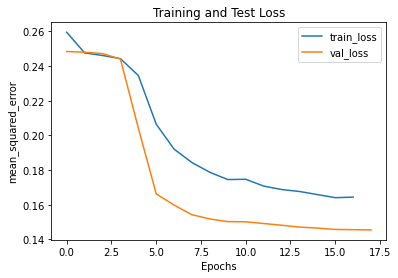

Saving parameters to  C:/Users/yumen/Documents/Schmidt Academy/cfl/vb_k_test3\experiment0024\trained_blocks\CondExpMod


In [17]:
data_info = {'X_dims': x.shape, 
             'Y_dims': y.shape, 
             'Y_type': 'categorical'}

# parameters for CDE 
condExp_params = {'batch_size': 128,
                  'optimizer': 'adam',
                  'n_epochs': 17,
                  'opt_config': {'lr': 0.001},
                  'verbose': 1,
                  'show_plot': True,
                  'dense_units': [100, 50, 10, 2],
                  'activations': ['relu', 'relu', 'relu', 'softmax'],
                 'dropouts': [0.2, 0.5, 0.5, 0],
                 'weights_path': None,
                 'loss': 'mean_squared_error',
                 'name': 'CondExpMod',
                 'standardize': False,
                 'best': True}

             
             

block_names = ['CondExpMod']
block_params = [condExp_params]

# save_path = '/Users/imanwahle/Desktop/cfl/examples/exp_results'
save_path = 'C:/Users/yumen/Documents/Schmidt Academy/cfl/vb_k_test3'
my_exp = Experiment(X_train=x, Y_train=y, data_info=data_info, block_names=block_names, block_params=block_params, blocks=None, results_path=save_path)



In [47]:
cde_results_dict = joblib.load(os.path.join('/', save_path, 'experiment0000/dataset_train/CondExpMod_results.pickle'))


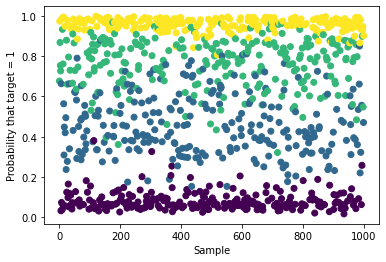

Average prediction for x-class 0: 0.08
Average prediction for x-class 1: 0.46
Average prediction for x-class 2: 0.75
Average prediction for x-class 3: 0.95


In [46]:
truth = vb_data.getGroundTruth()

#choose a thousand random samples from the pyx results 
plot_idx = np.random.choice(pyx.shape[0], 1000, replace=False)

# plot them 
plt.scatter(range(1000), pyx[plot_idx,1], c=truth[plot_idx])
plt.ylabel("Probability that target = 1")
plt.xlabel("Sample")
plt.show()

for i in range(4):
    print('Average prediction for x-class {}: {:.2f}'.format(i, np.mean(pyx[truth==i,1])))

In [25]:
# # this graph is the reverse of the above graph
# plt.scatter(range(1000), pyx[plot_idx,0], c=truth[plot_idx])
# plt.ylabel("Probability that target = 0")
# plt.xlabel("Sample")
# plt.show()

# for i in range(4):
#     print('Average prediction for x-class {}: {:.2f}'.format(i, np.mean(pyx[truth==i,0])))


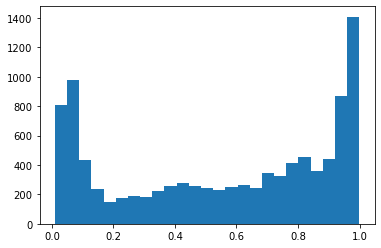

In [78]:
# show all the probabilities that y=1
plt.hist(pyx[:, 1], bins=25)
plt.show()

#same info as above, in a hist

In [79]:
# create a number of Kmeans objects with different Ks 
k_range = range(2, 5)

kmeans_l = []
for n_clusters in k_range:
    params = {'n_Xclusters': n_clusters, 'n_Yclusters': 2} 
    kmeans_obj = KMeans('Kmeans', data_info, params, random_state=143)
    kmeans_l.append(kmeans_obj)

data = Dataset(x, y)

# trained all the data on the kmeanss 
x_lbls_L = []
for kmeans_obj in kmeans_l: 
  cluster_results = kmeans_obj.train(data, cde_results_dict)
  x_lbls_L.append(cluster_results['x_lbls'])

In [80]:
link, label = sk.convert_lbls_to_sankey_nodes(x_lbls_L)
# plot
fig = go.Figure(data=
          [go.Sankey(node = dict(pad = 15, thickness=20, label = label, color =  "blue"),
                     link = link)])
    
fig.update_layout(title_text="Visual Bars Clustering, no noise, with 2 to 7 Clusters", font_size=10)
fig.show()

In [33]:
# x_lbls_L[2][plot_idx].shape


(1000,)

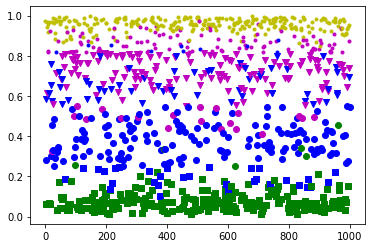

In [81]:
truth = vb_data.getGroundTruth()


# plot them 
markers = ["." , "," , "o" , "v" ]
colors = ['g','b', 'm', 'y']

#choose a thousand random samples from the pyx results 
plot_idx = np.random.choice(pyx.shape[0], 1000, replace=False)

# for each sample 
for i in range(1000):  
    pi = pyx[plot_idx[i],1] # plot probability  
    mi = markers[x_lbls_L[2][plot_idx[i]]] #marker based on cluster assignment
    ci = colors[truth[plot_idx[i]]] #color based on ground truth class

    plt.scatter(i,pi, marker=mi, color=ci) 
plt.show() 

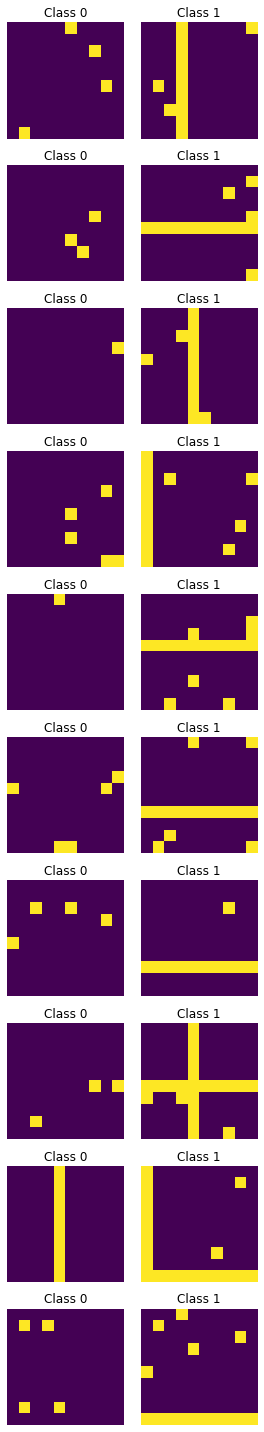

In [82]:
from cfl.visualization_methods import general_vis as vis

vis.view_class_examples(ims, im_shape, 10, x_lbls_L[0])

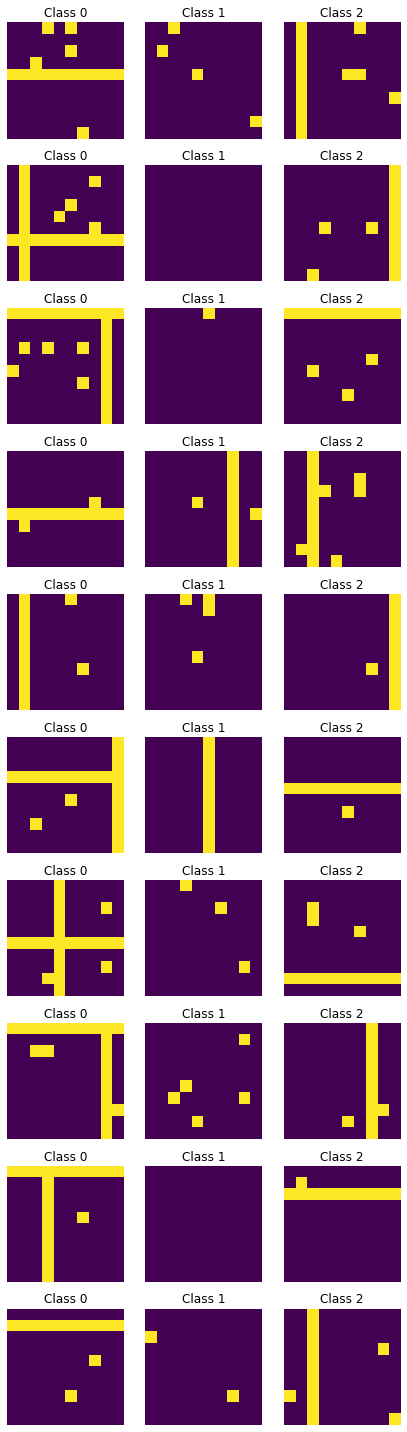

In [83]:
vis.view_class_examples(ims, im_shape, 10, x_lbls_L[1])

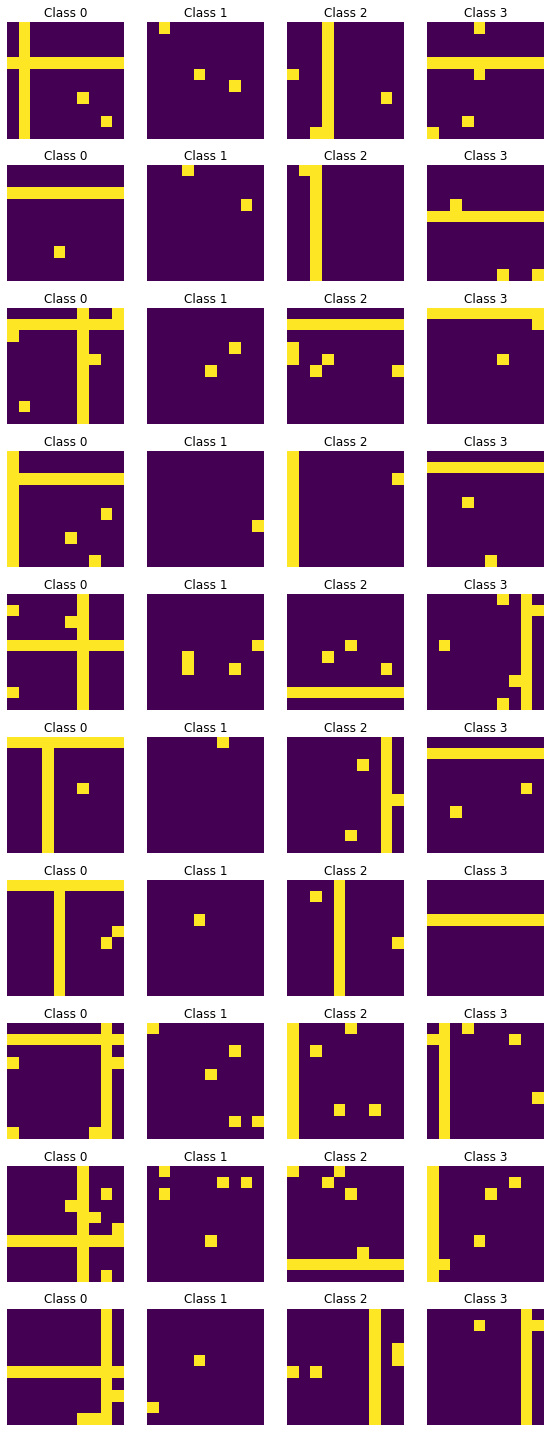

In [84]:
vis.view_class_examples(ims, im_shape, 10, x_lbls_L[2])

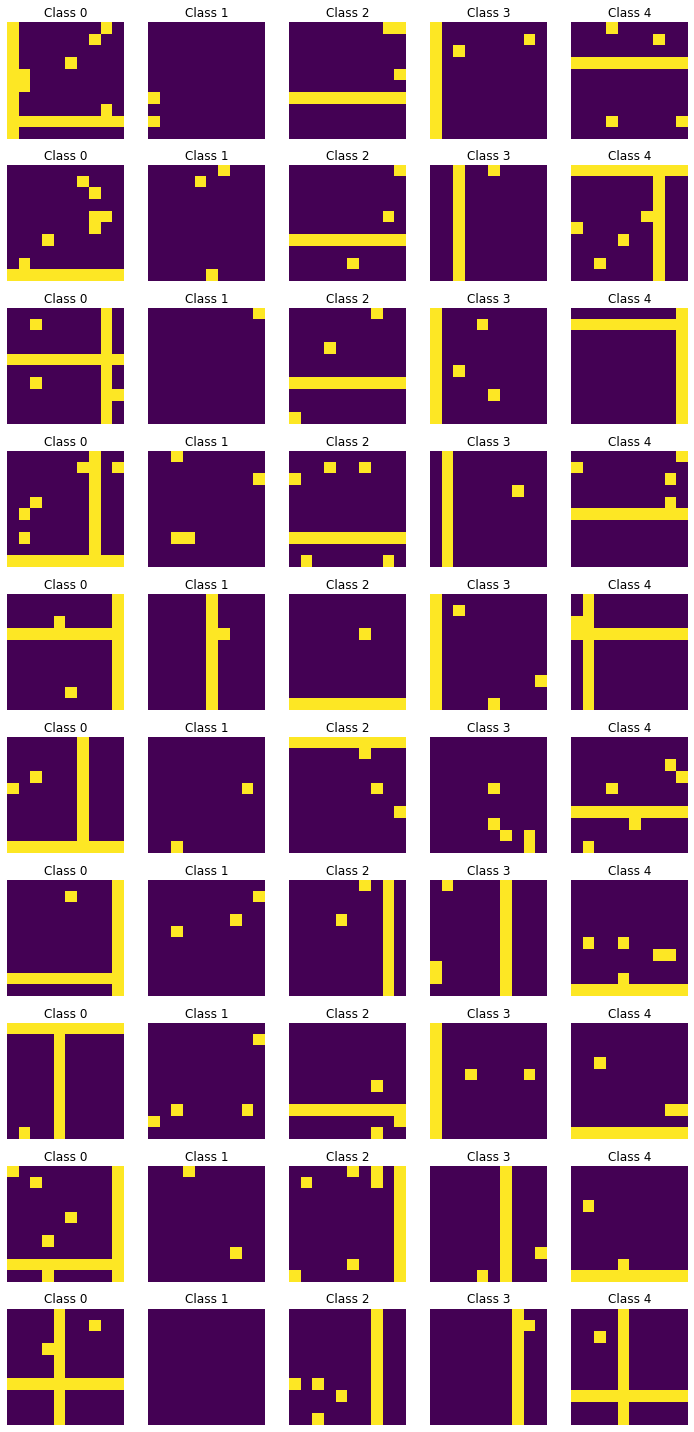

In [38]:
# vis.view_class_examples(ims, im_shape, 10, x_lbls_L[3])

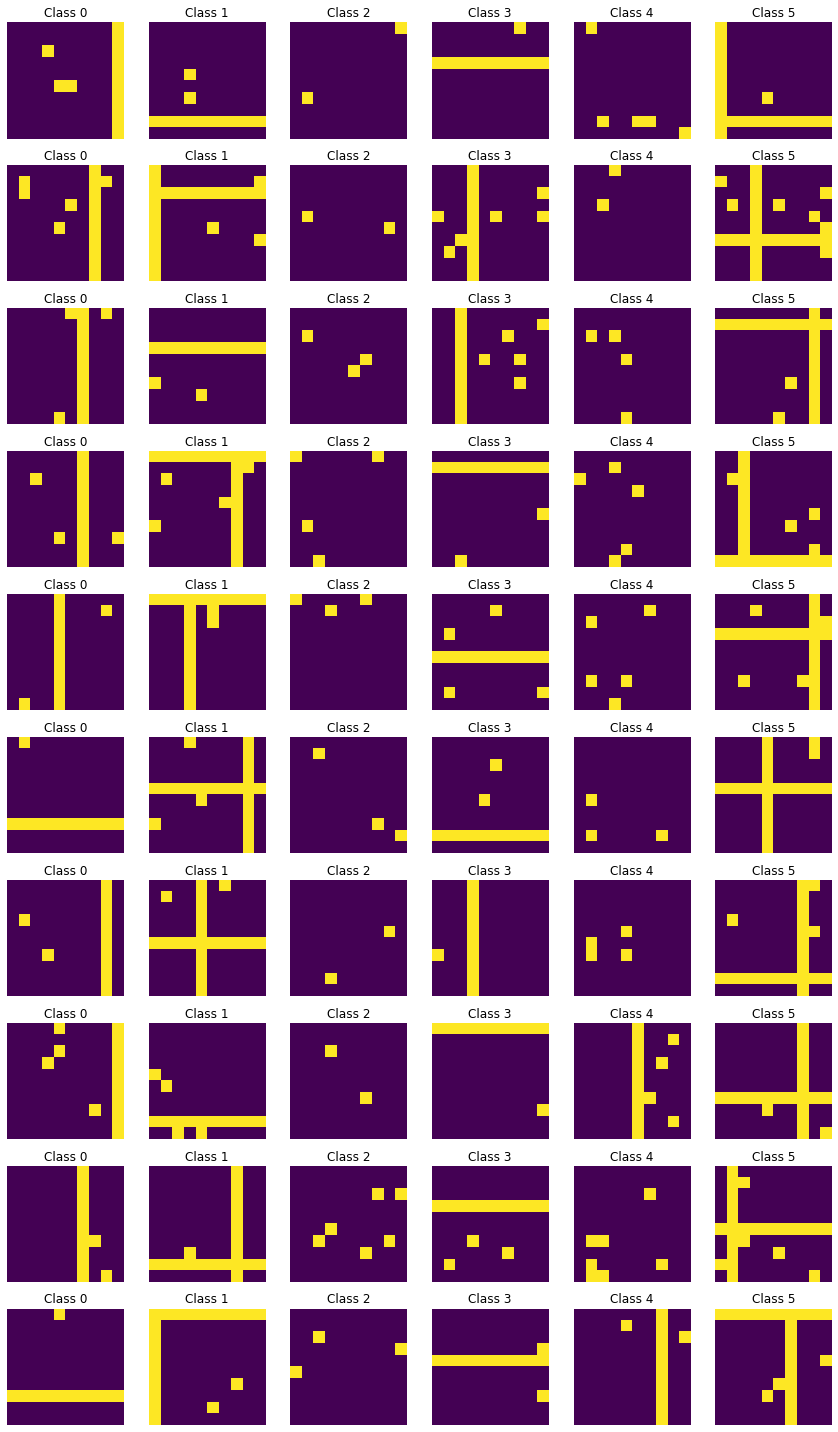

In [39]:
# vis.view_class_examples(ims, im_shape, 10, x_lbls_L[4])

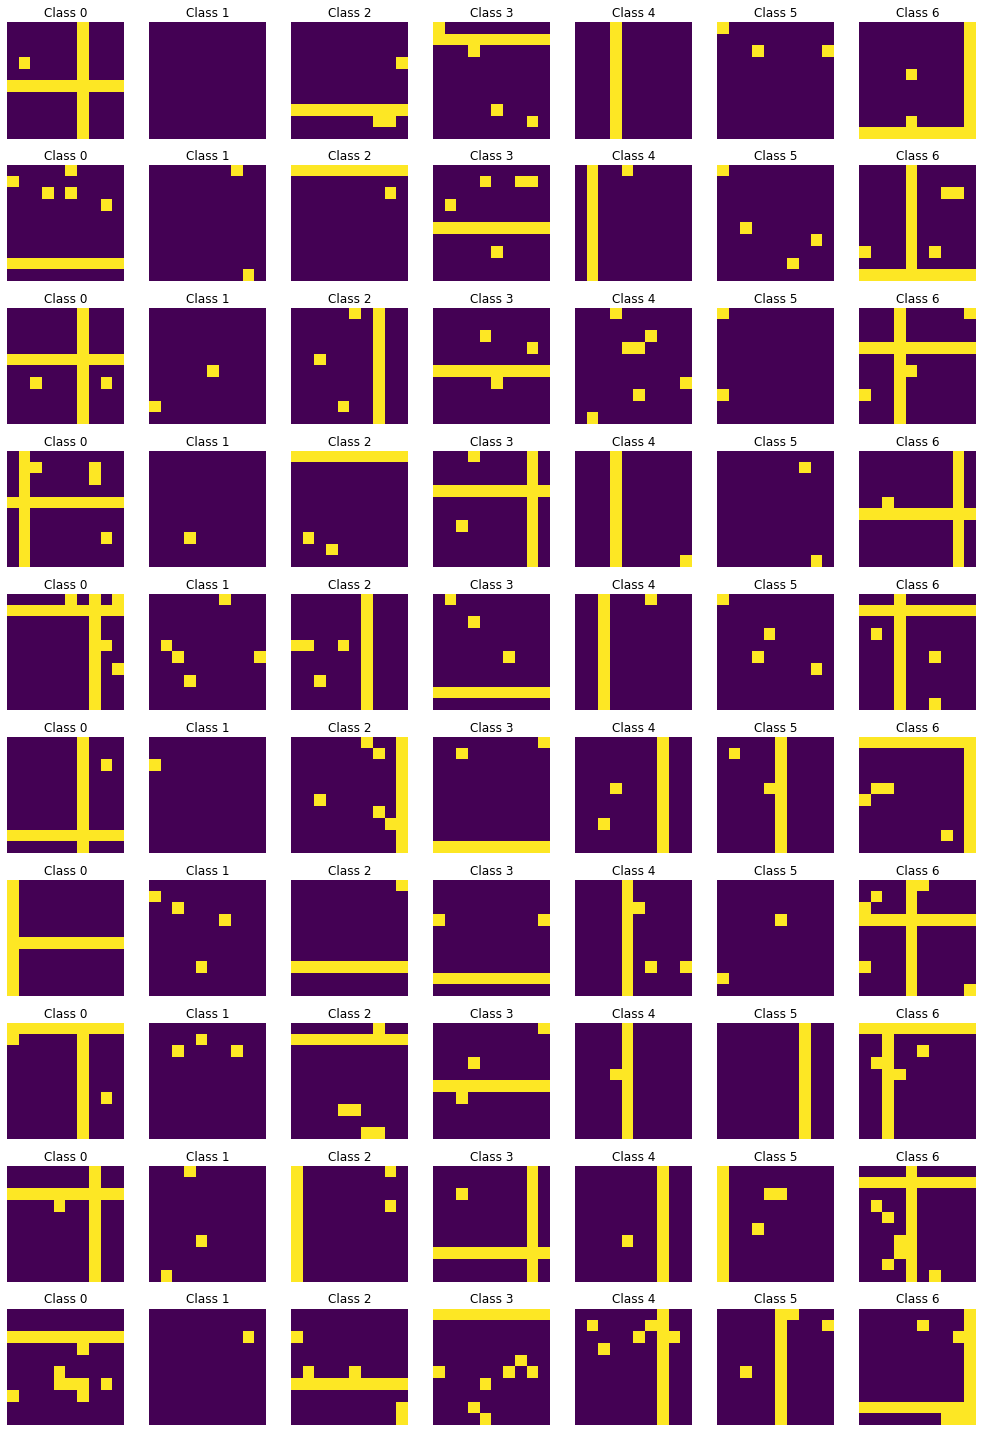

In [40]:
# vis.view_class_examples(ims, im_shape, 10, x_lbls_L[5])

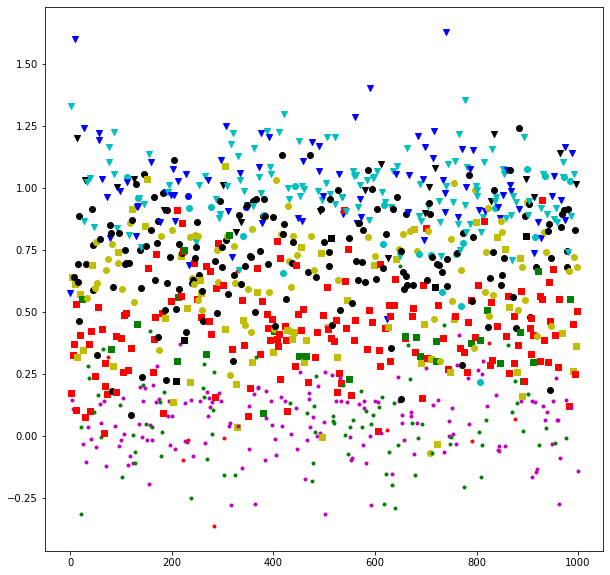

In [41]:
# truth = vb_data.getGroundTruth()


# # plot them 
# markers = ["." , "," , "o" , "v" , "^" , "<", ">"]
# colors = ['c','m', 'y', 'k', 'r', 'g','b']


# #choose a thousand random samples from the pyx results 
# plot_idx = np.random.choice(pyx.shape[0], 1000, replace=False)

# # for each sample 
# fig = plt.figure(figsize=(10, 10))
# for i in range(1000):  
#     pi = pyx[plot_idx[i],1] # plot probability  
#     mi = markers[truth[plot_idx[i]]] #marker based on ground truth 
#     ci = colors[x_lbls_L[5][plot_idx[i]]] #color based on cluster assignment 

#     plt.scatter(i,pi, marker=mi, color=ci) 
# plt.show() 